In [1]:
pip install folium

In [2]:
import os, re, glob
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import IFrame
from IPython.display import Image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

In [3]:
root = 'C:/Users/antho/Desktop/covid'
recent_date = "12-31-2021"
previous_date = "09-01-2021"
 
duplicate_columns = {"Lat": "Latitude", 
                     "Long_": "Longitude",
                     "Incidence_Rate": "Incident_Rate",
                     "Case-Fatality_Ratio": "Case_Fatality_Ratio",
                     "Province/State": "Province_State",
                     "Country/Region": "Country_Region",
                     "Last Update": "Last_Update"}
 
recent_df = pd.read_csv(os.path.join(root, (recent_date + ".csv")))
previous_df = pd.read_csv(os.path.join(root, (previous_date + ".csv")))
 
for key, value in duplicate_columns.items(): 
    if key in recent_df.columns:
        recent_df = recent_df.rename(columns={key: value}) 
    if key in previous_df.columns:
        previous_df = previous_df.rename(columns={key: value})

In [4]:
recent_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-01-01 04:22:14,33.93911,67.709953,158084,7356,NaN,NaN,Afghanistan,406.089743,4.653222
1,NaN,NaN,NaN,Albania,2022-01-01 04:22:14,41.15330,20.168300,210224,3217,NaN,NaN,Albania,7305.024672,1.530272
2,NaN,NaN,NaN,Algeria,2022-01-01 04:22:14,28.03390,1.659600,218432,6276,NaN,NaN,Algeria,498.122701,2.873205
3,NaN,NaN,NaN,Andorra,2022-01-01 04:22:14,42.50630,1.521800,23740,140,NaN,NaN,Andorra,30725.425484,0.589722
4,NaN,NaN,NaN,Angola,2022-01-01 04:22:14,-11.20270,17.873900,81593,1770,NaN,NaN,Angola,248.257575,2.169304


In [5]:
previous_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-09-02 04:21:15,33.93911,67.709953,153260,7123,NaN,NaN,Afghanistan,393.697743,4.647658
1,NaN,NaN,NaN,Albania,2021-09-02 04:21:15,41.15330,20.168300,147369,2501,NaN,NaN,Albania,5120.890958,1.697100
2,NaN,NaN,NaN,Algeria,2021-09-02 04:21:15,28.03390,1.659600,196527,5302,NaN,NaN,Algeria,448.169500,2.697848
3,NaN,NaN,NaN,Andorra,2021-09-02 04:21:15,42.50630,1.521800,15046,130,NaN,NaN,Andorra,19473.241442,0.864017
4,NaN,NaN,NaN,Angola,2021-09-02 04:21:15,-11.20270,17.873900,47781,1227,NaN,NaN,Angola,145.380060,2.567966


In [6]:
current_df = pd.DataFrame(columns=['Province_State','Country_Region','Confirmed','Deaths'])
current_df['Province_State'] = recent_df['Province_State']
current_df['Country_Region'] = recent_df['Country_Region']
current_df['Confirmed'] = recent_df['Confirmed'] - previous_df['Confirmed'] 
current_df['Deaths'] = recent_df['Deaths'] - previous_df['Deaths'] 
current_df['Latitude'] = recent_df['Latitude']
current_df['Longitude'] = recent_df['Longitude']

In [7]:
current_df.shape

(4008, 6)

In [8]:
current_df.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,NaN,Afghanistan,4824.0,233.0,33.93911,67.709953
1,NaN,Albania,62855.0,716.0,41.15330,20.168300
2,NaN,Algeria,21905.0,974.0,28.03390,1.659600
3,NaN,Andorra,8694.0,10.0,42.50630,1.521800
4,NaN,Angola,33812.0,543.0,-11.20270,17.873900


In [9]:
name_number = 'AnthonetteAdanyin_2120726_2.csv'
current_df.to_csv(name_number, index=False)

In [10]:
data = pd.read_csv(name_number)

In [11]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,NaN,Afghanistan,4824.0,233.0,33.93911,67.709953
1,NaN,Albania,62855.0,716.0,41.15330,20.168300
2,NaN,Algeria,21905.0,974.0,28.03390,1.659600
3,NaN,Andorra,8694.0,10.0,42.50630,1.521800
4,NaN,Angola,33812.0,543.0,-11.20270,17.873900


In [12]:
print(data.shape)

(4008, 6)


In [13]:
print(data.count())

Province_State    3832
Country_Region    4008
Confirmed         4006
Deaths            4006
Latitude          3918
Longitude         3918
dtype: int64


# Question 1  Print how many null values exist in the dataset?

isnull().sum() function print the sum of the null values in the data set

In [14]:
data.isnull().sum()

Province_State    176
Country_Region      0
Confirmed           2
Deaths              2
Latitude           90
Longitude          90
dtype: int64

In [15]:
data.loc[data['Province_State'].isnull(),'Province_State'] = data['Country_Region']

In [16]:
print(data.count())

Province_State    4008
Country_Region    4008
Confirmed         4006
Deaths            4006
Latitude          3918
Longitude         3918
dtype: int64


In [17]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,Afghanistan,Afghanistan,4824.0,233.0,33.93911,67.709953
1,Albania,Albania,62855.0,716.0,41.15330,20.168300
2,Algeria,Algeria,21905.0,974.0,28.03390,1.659600
3,Andorra,Andorra,8694.0,10.0,42.50630,1.521800
4,Angola,Angola,33812.0,543.0,-11.20270,17.873900


In [18]:
states = data['Province_State'].unique()
print("Number of unique States - ", len(states))

Number of unique States -  767


# Question 2  

Print how many unique countries exist in the dataset using a similar approach.

In [19]:
Country = data['Country_Region'].unique()
print("Number of unique Country - ", len(Country))

Number of unique Country -  198


In [20]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [21]:
import datetime, time, requests
from time import sleep
from geopy.geocoders import Nominatim
 
 
def get_lat_lon(place):
    geolocator = Nominatim(user_agent=name_number)
    location = geolocator.geocode(place)
    lat_lon = location.latitude, location.longitude
    
    output = [float(i) for i in lat_lon]
    return output

In [22]:
from tqdm import tqdm
 
geo_lat = []
geo_lon = []
 
not_found = []
found = []
for state in tqdm(states):
    time.sleep(0.2)
    lat_lon = [None, None]
    try:
        lat_lon = get_lat_lon(state)
        found.append(state)
    except:   
        not_found.append(state)
        
    geo_lat.append(lat_lon[0])
    geo_lon.append(lat_lon[1])
 
if len(not_found) > 0:
    print("Locations are not found for - ", not_found)
else:
    print("Found all the locations")

100%|████████████████████████████████████████████████████████████████████████████████| 767/767 [06:31<00:00,  1.96it/s]

Locations are not found for -  ['Repatriated Travellers', 'W.P. Kuala Lumpur', 'Bonaire, Sint Eustatius and Saba', 'Sakha (Yakutiya) Republic', 'Summer Olympics 2020']


In [23]:
states_list = states.tolist() #converting states to list to index list's items   
lats = []
lons = []
for i, r in data.iterrows():
    state = r['Province_State']
    index_list = states_list.index(state)
    lats.append(geo_lat[index_list])
    lons.append(geo_lon[index_list])
    
    
data['Latitude1'] = lats
data['Longitude1'] = lons

Comparing latitude and longitude in the data set with those generated using geopy

In [24]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,Latitude1,Longitude1
0,Afghanistan,Afghanistan,4824.0,233.0,33.93911,67.709953,33.768006,66.238514
1,Albania,Albania,62855.0,716.0,41.15330,20.168300,41.000028,19.999962
2,Algeria,Algeria,21905.0,974.0,28.03390,1.659600,28.000027,2.999983
3,Andorra,Andorra,8694.0,10.0,42.50630,1.521800,42.540717,1.573203
4,Angola,Angola,33812.0,543.0,-11.20270,17.873900,-11.877577,17.569124


# Question 3

Check whether the latitude and longitude values we retrieved from geopy are same as the latitude and
longitude given in the dataset. Identify and report differences in values.

None of the longitude and latitude generated by geopy were identical to those already in the data collection. There was a slight difference between the in the range of ±0.5

//Proceed to remove the extra column created by geopy for longitude1 and latitude1

In [26]:
data = data.drop(['Latitude1','Longitude1'], axis=1)

In [27]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,Afghanistan,Afghanistan,4824.0,233.0,33.93911,67.709953
1,Albania,Albania,62855.0,716.0,41.15330,20.168300
2,Algeria,Algeria,21905.0,974.0,28.03390,1.659600
3,Andorra,Andorra,8694.0,10.0,42.50630,1.521800
4,Angola,Angola,33812.0,543.0,-11.20270,17.873900


In [28]:
data = data[data['Latitude'].notna()]

In [29]:
data = data[data['Longitude'].notna()]

In [30]:
data.shape

(3918, 6)

In [31]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Province_State    0
Country_Region    0
Confirmed         2
Deaths            2
Latitude          0
Longitude         0
dtype: int64

In [32]:
data[data['Confirmed'].isnull()]

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
4006,Winter Olympics 2022,Winter Olympics 2022,NaN,NaN,39.9042,116.4074
4007,Antarctica,Antarctica,NaN,NaN,-71.9499,23.3470


In [33]:
data[data['Deaths'].isnull()]

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
4006,Winter Olympics 2022,Winter Olympics 2022,NaN,NaN,39.9042,116.4074
4007,Antarctica,Antarctica,NaN,NaN,-71.9499,23.3470


In [34]:
data = data[data['Confirmed'].notna()]

In [35]:
data = data[data['Deaths'].notna()]

In [36]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Province_State    0
Country_Region    0
Confirmed         0
Deaths            0
Latitude          0
Longitude         0
dtype: int64

In [37]:
data.dtypes

Province_State     object
Country_Region     object
Confirmed         float64
Deaths            float64
Latitude          float64
Longitude         float64
dtype: object

In [38]:
data.tail(20)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
3985,Channel Islands,United Kingdom,-97453.0,-4325.0,49.372300,-2.364400
3986,England,United Kingdom,10848208.0,127176.0,52.355500,-1.174300
3987,Falkland Islands (Malvinas),United Kingdom,-100544.0,-917.0,-51.796300,-59.523600
3988,Gibraltar,United Kingdom,-70329.0,-311.0,36.140800,-5.353600
3989,Isle of Man,United Kingdom,-35221.0,-624.0,54.236100,-4.548100
3990,Montserrat,United Kingdom,-91722.0,-1013.0,16.742498,-62.187366
3991,Northern Ireland,United Kingdom,357218.0,2548.0,54.787700,-6.492300
3992,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-68986.0,-506.0,-7.946700,-14.355900
3993,Scotland,United Kingdom,912854.0,9831.0,56.490700,-4.202600
3994,Turks and Caicos Islands,United Kingdom,-84967.0,-602.0,21.694000,-71.797900


There are negative values in the confirmed and death column. Lets take vanutu for an example, the total population is less than 400,000 from world0meter but we have -790748.0 as the total confirmed case and -19300.0 as Death. From worldmeter also, as at January 2022, total covid cases for vanuatu is 18 and confirmed death is 1. The same applies to isle of mann, yemen etc. this means there are issues with those data and they should be removed.

In [39]:
data = data[data['Confirmed']>= 0]
data = data[data['Deaths']>= 0]

In [40]:
data.tail(20)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
3967,Lviv Oblast,Ukraine,219941.0,5978.0,49.839700,24.029700
3968,Mykolaiv Oblast,Ukraine,110004.0,3178.0,46.975000,31.994600
3969,Odessa Oblast,Ukraine,233496.0,5522.0,46.484600,30.732600
3970,Poltava Oblast,Ukraine,140099.0,3732.0,49.588300,34.551400
3972,Sevastopol*,Ukraine,52696.0,1840.0,44.605400,33.522000
3974,Ternopil Oblast,Ukraine,104830.0,2094.0,49.553500,25.594800
3975,Vinnytsia Oblast,Ukraine,112346.0,3099.0,49.233100,28.468200
3978,Zaporizhia Oblast,Ukraine,25071.0,4171.0,47.838800,35.139600
3979,Zhytomyr Oblast,Ukraine,140437.0,3245.0,50.254700,28.658700
3986,England,United Kingdom,10848208.0,127176.0,52.355500,-1.174300


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 4005
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  2327 non-null   object 
 1   Country_Region  2327 non-null   object 
 2   Confirmed       2327 non-null   float64
 3   Deaths          2327 non-null   float64
 4   Latitude        2327 non-null   float64
 5   Longitude       2327 non-null   float64
dtypes: float64(4), object(2)
memory usage: 127.3+ KB


Running data.info() shows our dataset is clean and we can proceed with clustering

In [42]:
clustering_data = data[["Confirmed", "Deaths"]]

In [43]:
clustering_data.head()

,Confirmed,Deaths
0,4824.0,233.0
1,62855.0,716.0
2,21905.0,974.0
3,8694.0,10.0
4,33812.0,543.0


In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit(clustering_data).transform(clustering_data.astype(np.float))
print (X_scaled)

[[-0.15295454 -0.14195164]
 [ 0.009778   -0.05184916]
 [-0.10505541 -0.00371989]
 ...
 [-0.13808649  0.18469316]
 [ 0.54656178  0.51115142]
 [ 0.43154329  0.74806685]]


In [45]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,Afghanistan,Afghanistan,4824.0,233.0,33.93911,67.709953
1,Albania,Albania,62855.0,716.0,41.15330,20.168300
2,Algeria,Algeria,21905.0,974.0,28.03390,1.659600
3,Andorra,Andorra,8694.0,10.0,42.50630,1.521800
4,Angola,Angola,33812.0,543.0,-11.20270,17.873900


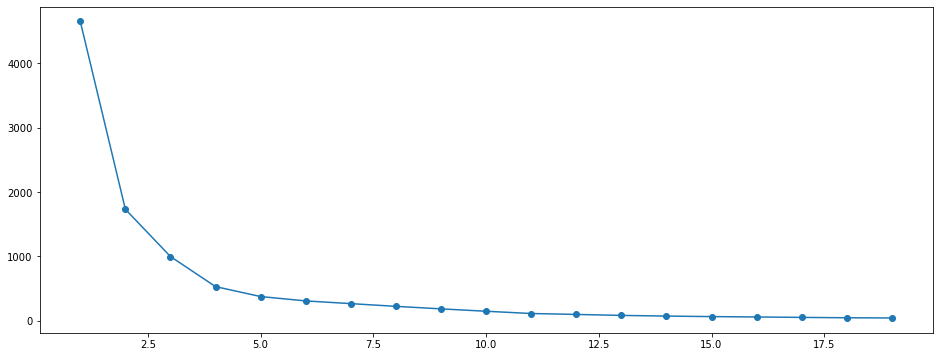

In [46]:
cluster_range = range( 1, 20 )
cluster_errors = []
 
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                             "cluster_errors": cluster_errors } )
 
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [47]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X_scaled)
 
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
 
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
clustering_data['cluster'] = cluster

In [48]:
clustering_data.head(10)

,Confirmed,Deaths,cluster
0,4824.0,233.0,1
1,62855.0,716.0,1
2,21905.0,974.0,1
3,8694.0,10.0,1
4,33812.0,543.0,1
5,2564.0,75.0,1
6,463460.0,5164.0,1
7,102180.0,3115.0,1
8,3577.0,12.0,1
9,180661.0,507.0,1


In [49]:
kmeans_mean_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Confirmed,Deaths
cluster,,
1,32923.9,543.8
2,10164593.5,104751.0
3,1124323.7,18270.0
4,2612118.8,76188.6


In [50]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 2]

,Province_State,cluster
672,Turkey,2
3986,England,2


In [51]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 3]

,Province_State,cluster
216,France,3
265,Kerala,3
287,Iran,3
411,Ciudad de Mexico,3
419,Mexico,3
443,Morocco,3
482,Paraguay,3
511,Portugal,3
556,Moscow,3
557,Moscow Oblast,3


In [52]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 4]

,Province_State,cluster
497,Lima,4
509,Philippines,4
510,Poland,4
513,Romania,4
614,South Africa,4


In [53]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 1]

,Province_State,cluster
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Andorra,1
4,Angola,1
...,...,...
4000,Venezuela,1
4002,West Bank and Gaza,1
4003,Yemen,1
4004,Zambia,1


# Question 4

Cluster1- very low risk
cluster 2-  High risk
cluster 3- medium risk
cluster 4- low risk

According to Who data, the clusturing method is true because England and Turkey were red list countries for most countries between September 2021 and December 2021 due to the omicron strain of the Corona Virus. Cluster 3 countries were amber, while the majority of countries were Tier 1 because they had learned to cope with the virus by taking the required precautions and getting vaccinated.

comparing this with the 2020 data, we can also see that only England and Turkey remained as very high risk countries. This like i said is chiefly because of the outbreak of Omiron. Countries like Argentina moved from high risk to medium risk countries. 
Also we can see count of countries in both The very high risk and high risk clusters reduced leaving most countires in either medium risk or low risk 

In [54]:
 data.head(20)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster
0,Afghanistan,Afghanistan,4824.0,233.0,33.939110,67.709953,1
1,Albania,Albania,62855.0,716.0,41.153300,20.168300,1
2,Algeria,Algeria,21905.0,974.0,28.033900,1.659600,1
3,Andorra,Andorra,8694.0,10.0,42.506300,1.521800,1
4,Angola,Angola,33812.0,543.0,-11.202700,17.873900,1
5,Antigua and Barbuda,Antigua and Barbuda,2564.0,75.0,17.060800,-61.796400,1
6,Argentina,Argentina,463460.0,5164.0,-38.416100,-63.616700,1
7,Armenia,Armenia,102180.0,3115.0,40.069100,45.038200,1
8,Australian Capital Territory,Australia,3577.0,12.0,-35.473500,149.012400,1
9,New South Wales,Australia,180661.0,507.0,-33.868800,151.209300,1


In [55]:
def get_color(cluster_id):
    if cluster_id == 2:
        return 'darkred'
    if cluster_id == 1:
        return 'green'            
    if cluster_id == 3:
        return 'red'
    if cluster_id == 4:
        return 'yellow'
    
data["color"] = data["cluster"].apply(lambda x: get_color(x))

In [56]:
data.head(10)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster,color
0,Afghanistan,Afghanistan,4824.0,233.0,33.93911,67.709953,1,green
1,Albania,Albania,62855.0,716.0,41.15330,20.168300,1,green
2,Algeria,Algeria,21905.0,974.0,28.03390,1.659600,1,green
3,Andorra,Andorra,8694.0,10.0,42.50630,1.521800,1,green
4,Angola,Angola,33812.0,543.0,-11.20270,17.873900,1,green
5,Antigua and Barbuda,Antigua and Barbuda,2564.0,75.0,17.06080,-61.796400,1,green
6,Argentina,Argentina,463460.0,5164.0,-38.41610,-63.616700,1,green
7,Armenia,Armenia,102180.0,3115.0,40.06910,45.038200,1,green
8,Australian Capital Territory,Australia,3577.0,12.0,-35.47350,149.012400,1,green
9,New South Wales,Australia,180661.0,507.0,-33.86880,151.209300,1,green


In [57]:
#create a map
this_map = folium.Map(location =[data["Latitude"].mean(), 
                                 data["Longitude"].mean()], zoom_start=5)
 
def plot_dot(point):    
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2, 
                        color=point.color,
                        weight=1).add_to(this_map)
    
    
 
 
#clustered_full.apply(,axis=1) #use this to iterate through every row in your dataframe
data.apply(plot_dot, axis = 1)
 
 
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
 
#Save the map to an HTML file
this_map.save(os.path.join('covid_map_dataset2.html'))

In [58]:
#displaying saved covid map
from IPython.display import IFrame
IFrame(src='./covid_map_dataset2.html',width =900,height=400)

# Question 5

Covid 19 is an infectious disease caused by the SARS-CoV-2 virus. On 31st December 2019, WHO was informed of a cluster of cases of pneumonia of unknown cause detected in Wuhan, China. So far, there have been 429,229,223 cases and 5,931,537 deaths worldwide. Effective screening or vaccination enables quick and efficient diagnosis of the virus, mitigating the burden on the healthcare system.
According to BBC, Magaret Keenan, who turned 91 on 8th December 2020, was the first person in the world to be given the Pfizer covid 19 jab as part of the mass vaccination program. She considered the vaccine a birthday gift to her.
This analysis aims to ascertain how the world is coping with the virus through wearing of mask, isolation, vaccination, and improvement of general hygiene. I chose the data set from September to December 2020 (dataset1)  and September-December 2021(dataset2) using Kmeans clustering.
Firstly, the data was first consolidated, renamed accordingly, and then cleaned (null/ negative values were replaced or removed depending on the best approach for each situation).
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a data set. It is essential because it improves the data quality and, in so doing, increases overall productivity. For this case, it helped remove errors in the clustering and also negative clusters.
To confirm the accuracy of longitude and latitude in the dataset, I used Geopy. Geopy makes it easy to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocodes. 
Confirmed cases and Death are the only columns needed for the clustering analysis. That implies all other columns dropped, and I created a new data frame.
The confirmed cases and death scale (2 features needed for k means clustering) are different because several confirmed instances will always be more than Death. The data were normalized to reduce the scale using a standard scalar method. Please note that the k-means algorithm is dependent on Euclidean distance, so having two features on different scales can be problematic to the k-means algorithm.
To know the best value of K to use in the clustering, create a scree plot (a line plot that helps determine the number of clusters). The Elbow point defines the optimal value of k. the optimal values for k are k =3 and k =4. SSE is decreasing linearly after both of these points. For this analysis, 4 is the best value for K.
Since deaths and confirmed cases are in different scales, feeding the k value and the scaled data frame (X_scaled) to the K-Means algorithm is the best approach. Then calculate the mean value of k to get the value for each cluster. We had 4 clusters; cluster 2- High risk, cluster 3- medium risk, cluster 4- low risk, and cluster 1- very Low risk.
Data visualization was the final process assigning a color to each cluster, making it easier to read.

From the map, I agree with the result. The spread of covid dropped significantly except in countries like England and Turkey, which had an outbreak of the variant Omicron. This can be further justified by the WHO and world meter data. 
Only two countries remained in high-risk countries from 2020 to 2021, and they are England and Turkey, and this was because of the omicron variant of Covid 19. A country like Argentina became a medium risk country from high risk, and France moved from a very high risk to a medium-risk.

Globally there was a decline in the infection and death rate as nations implemented measures to manage the pandemic.


Refrences

Cabinet office (2020) Coronavirus: What has changed- 22 september.
Availale at: https://www.gov.uk/government/news/coronavirus-covid-19-what-has-changed-22-september (Accessed 1 March 2022).

World Health Organisation (2022) WHO Coronavirus (Covid19) Dashboard.
Available at: https://covid19.who.int/ (Accessed 1 March 2022)

Worldometer (2022) Covid19 Coronavirus Pandemic.
Available at: https://www.worldometers.info/coronavirus.

Department of Transport and Department of Health and Social care (2021): Red list of countries and Territories
Available at: https://www.gov.uk/guidance/red-list-of-countries-and-territories (Accessed 1 March 2022)

Juliana k., Laura F. and Morgan M. (2020) 'Ongoing list of how countries are reopening and which ones remain under lockdown'
BusinessInsider, 23 September. Available at:https://www.google.com/amp/s/www.businessinsider.com/countries-on-lockdown-coronavirus-italy-2020-3%3famp (Accessed 1 March 2022)